In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
df=pd.read_csv('./nombre_depanes_par_jour.csv', encoding='latin-1',sep=";")
df['Date début'] = pd.to_datetime(df['Date début'], format='%Y-%m-%d')



In [2]:
df.head()

,Date début,Number of Orders
0,2019-01-01,9.0
1,2019-01-02,9.0
2,2019-01-03,15.0
3,2019-01-04,8.0
4,2019-01-05,7.0


In [1]:
df.to_csv('nombre_depanes_par_jour.csv', index=False, encoding='latin-1',sep=";")

msk=(df['Date début']<'2021-07-30')
df_train=df[msk].copy()
df_test=df[~msk].copy()

NameError: name 'df' is not defined

In [4]:
from sklearn.ensemble import RandomForestRegressor

In [5]:
x_train=df_train.drop(['Number of Orders'], axis=1)

In [6]:
x_test=df_test.drop(['Number of Orders'], axis=1)

In [7]:
y_train=df_train['Number of Orders']

In [8]:
y_test=df_test['Number of Orders']

In [9]:
rfr=RandomForestRegressor(random_state=7)

In [10]:
rfr.fit(x_train, y_train)

RandomForestRegressor(random_state=7)

In [11]:
y_pred=rfr.predict(x_test)


<AxesSubplot:xlabel='Date début'>

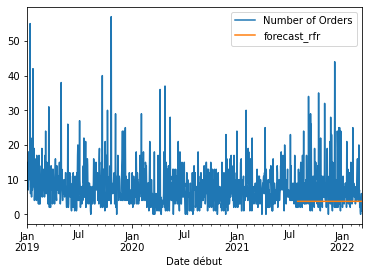

In [12]:
df['forecast_rfr'] = [None]*len(df_train) + list(y_pred)
df.index = df['Date début']
del df['Date début']
df.plot()

In [13]:
df.tail()

,Number of Orders,forecast_rfr
Date début,,
2022-03-06,0.0,3.74
2022-03-07,3.0,3.74
2022-03-08,4.0,3.74
2022-03-09,6.0,3.74
2022-03-10,1.0,3.74


In [14]:
from sklearn.metrics import mean_absolute_error, r2_score , mean_squared_error

mae = mean_absolute_error(y_test,y_pred)
r2= r2_score( y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))

print(f'mae - rfr: {mae}')
print(f'r2 - rfr: {r2}')
print(f'rmse - rfr: {rmse}')

mae - auto: 5.569107142857143
r2 - auto: -0.537870455267919
rmse - auto: 8.46392090835312
